交互分类表（包含百分比和合计）：
你愿意加入其他国籍吗    不加入  做外籍华人     其他  毫不犹豫加入     合计
政治面貌                                          
党员          25.00  58.33  16.67    0.00  100.0
其他          66.67  33.33   0.00    0.00  100.0
团员          41.85  25.55  29.52    3.08  100.0
群众          34.62  15.38  38.46   11.54  100.0
合计          40.67  26.12  29.48    3.73  100.0

双变量相关系数：
                政治面貌  你愿意加入其他国籍吗
政治面貌        1.000000   -0.009856
你愿意加入其他国籍吗 -0.009856    1.000000

卡方检验结果：
Chi-Square: 14.864093353265485
P-value: 0.094737386851862


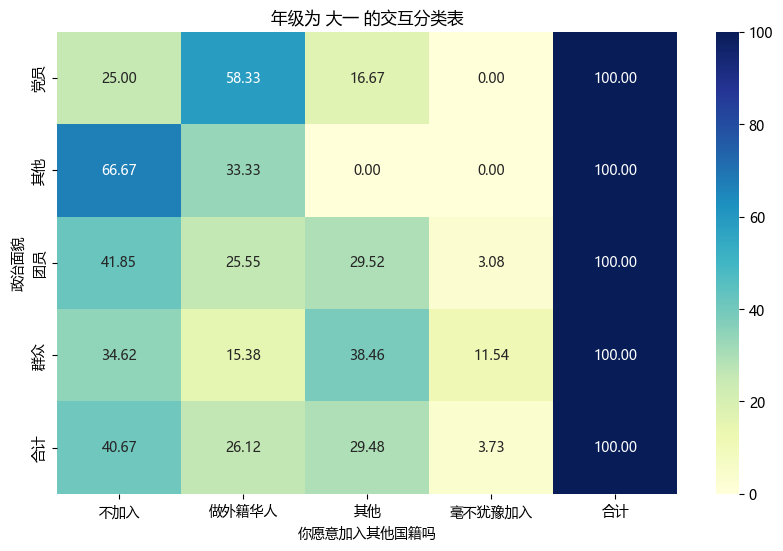

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
file_path = 'date\国家认同数据清理后 (2).sav' # 替换为你的.sav文件路径
data = pd.read_spss(file_path)
# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 替换为你选择的支持的中文字体

# 假设 '大三' 为特定年级
specific_grade = '大一'

# 选择特定年级的数据
specific_grade_data = data[data['年级'] == specific_grade]

# 选择类别变量和政治面貌进行交互分类表
cross_table = pd.crosstab(index=specific_grade_data['政治面貌'], columns=specific_grade_data['你愿意加入其他国籍吗'], margins=True, margins_name='合计')

# 计算百分比
cross_table_percentage = cross_table.div(cross_table['合计'], axis=0) * 100
cross_table_percentage = cross_table_percentage.round(2) # 四舍五入保留两位小数

# 打印交互分类表
print("交互分类表（包含百分比和合计）：")
print(cross_table_percentage)

# 双变量相关系数
correlation = specific_grade_data[['政治面貌', '你愿意加入其他国籍吗']].apply(lambda x: pd.factorize(x)[0]).corr(method='pearson')

# 打印相关系数
print("\n双变量相关系数：")
print(correlation)

# 卡方检验
chi2, p, _, _ = chi2_contingency(cross_table.iloc[:-1, :-1]) # 不包含合计行和列的部分进行卡方检验

# 打印卡方检验结果
print(f"\n卡方检验结果：\nChi-Square: {chi2}\nP-value: {p}")

# 可视化交互分类表
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table_percentage, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title(f'年级为 {specific_grade} 的交互分类表')
plt.xlabel('你愿意加入其他国籍吗')
plt.ylabel('政治面貌')
plt.show()


交互分类表（包含百分比和合计）：
你愿意加入其他国籍吗    不加入  做外籍华人      其他  毫不犹豫加入     合计
政治面貌 年级                                        
党员   大一     25.00  58.33   16.67    0.00  100.0
     大三     34.09  27.27   29.55    9.09  100.0
     大二     33.33  29.63   22.22   14.81  100.0
     大四     25.00  45.00   25.00    5.00  100.0
其他   大一     66.67  33.33    0.00    0.00  100.0
     大三     37.50  37.50   12.50   12.50  100.0
     大二     40.00  20.00   40.00    0.00  100.0
团员   大一     41.85  25.55   29.52    3.08  100.0
     大三     38.37  32.56   24.42    4.65  100.0
     大二     34.55  30.37   29.84    5.24  100.0
     大四     42.11  24.56   29.82    3.51  100.0
     预科     25.00  66.67    0.00    8.33  100.0
群众   大一     34.62  15.38   38.46   11.54  100.0
     大三     27.27  31.82   36.36    4.55  100.0
     大二     26.92  23.08   42.31    7.69  100.0
     大四     27.27  36.36   27.27    9.09  100.0
     预科      0.00   0.00  100.00    0.00  100.0
合计          36.63  29.31   28.79    5.27  100.0


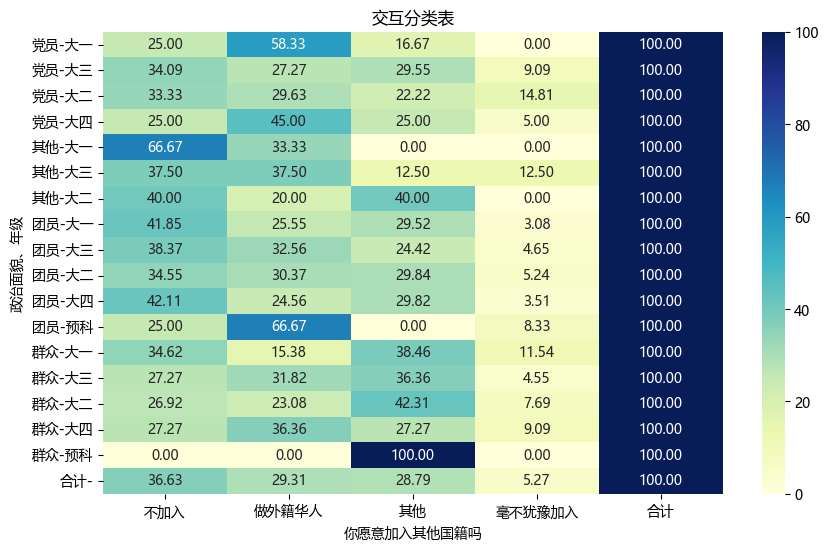

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 替换为你选择的支持的中文字体

# 读取.sav文件
file_path = 'date\国家认同数据清理后 (2).sav' # 替换为你的.sav文件路径
data = pd.read_spss(file_path)

# 创建交互分类表
cross_table = pd.crosstab(index=[data['政治面貌'], data['年级']], columns=data['你愿意加入其他国籍吗'], margins=True, margins_name='合计')

# 计算百分比
cross_table_percentage = cross_table.div(cross_table['合计'], axis=0) * 100
cross_table_percentage = cross_table_percentage.round(2) # 四舍五入保留两位小数

# 打印交互分类表
print("交互分类表（包含百分比和合计）：")
print(cross_table_percentage)

# 可视化交互分类表
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table_percentage, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('交互分类表')
plt.xlabel('你愿意加入其他国籍吗')
plt.ylabel('政治面貌、年级')
plt.show()